### IMPORTS

In [180]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
SAVE_PATH = "../saves/"

In [183]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            # Compare the current element with all other elements using broadcasting
            is_dominated = np.all(arr_np[i] <= arr_np, axis=1) & np.any(arr_np[i] < arr_np, axis=1)
            # Update the mask to mark dominated elements as False
            is_pareto_efficient[is_dominated] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient

In [184]:
savefiles = [file for file in os.listdir(SAVE_PATH)] 
savefiles

['pareto.csv',
 'saves_1710502540563.csv',
 'saves_1710502616293.csv',
 'saves_1710502702203.csv',
 'saves_1710502795933.csv',
 'saves_1710513923401.csv',
 'saves_1710514182799.csv',
 'saves_1710514219897.csv',
 'saves_1710514418808.csv',
 'saves_1710514601277.csv',
 'saves_1710514689193.csv',
 'saves_1710514832352.csv',
 'saves_1710515003559.csv',
 'saves_1710515295123.csv',
 'saves_1710515637176.csv',
 'saves_1710519955596.csv',
 'saves_1710520847852.csv',
 'saves_1710521962273.csv']

### VISUALIZATION

In [185]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,1644,7306,8950,"[34,4,144,70,19,87,121,178,2,32,61,84,77,112,9...",True
1,1649,7301,8950,"[34,4,144,70,19,87,121,178,2,32,61,84,77,112,9...",True
2,1674,7279,8953,"[34,4,144,70,19,87,121,178,2,32,61,84,77,112,9...",True
3,1657,7299,8956,"[34,4,144,70,19,87,121,178,2,169,61,84,77,112,...",True
4,1618,7339,8957,"[34,4,144,70,19,87,121,178,2,32,61,84,77,112,1...",True
...,...,...,...,...,...
534,7080,6273,13353,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
535,7151,6272,13423,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
536,7256,6270,13526,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
537,7402,6269,13671,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True


In [186]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    if "index" in contracts.columns:
        contracts = contracts.drop(columns=["index"])
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
        print(savefile, "saved without index")
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto = pareto.drop_duplicates()

pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
500,1541,7278,8819,"[34,4,144,70,19,41,121,178,102,75,182,84,77,11...",True
560,1488,7338,8826,"[34,4,144,70,19,87,121,178,161,102,145,84,77,1...",True
501,1557,7275,8832,"[34,4,144,70,19,41,121,178,101,161,182,84,77,1...",True
470,1570,7262,8832,"[34,4,144,70,19,41,121,178,102,75,182,84,77,11...",True
457,1574,7259,8833,"[34,4,144,70,19,41,121,178,161,102,182,84,77,1...",True
...,...,...,...,...,...
534,7080,6273,13353,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
24658,7151,6272,13423,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
536,7256,6270,13526,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
537,7402,6269,13671,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True


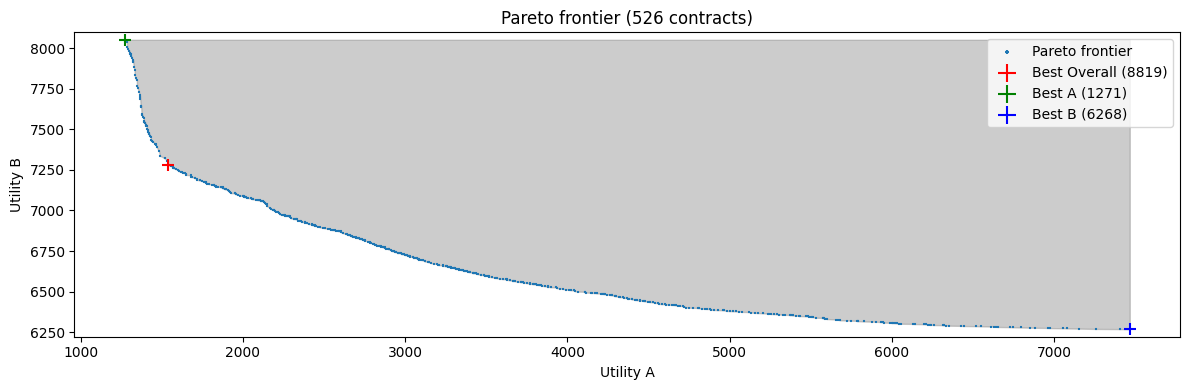

In [187]:
pareto = pareto.sort_values(by="utilA", ascending=True)
plt.figure(figsize=(12,4))
plt.title(f"Pareto frontier ({len(pareto)} contracts)")
plt.fill_between(pareto["utilA"], pareto["utilB"], np.max(pareto["utilB"]), color='gray', alpha=0.4)
plt.scatter(pareto["utilA"], pareto["utilB"], marker="+", s=plt.rcParams["lines.markersize"]**0.5, label="Pareto frontier")

bestOverall = pareto[pareto["utilSum"] == pareto["utilSum"].min()]
plt.scatter(bestOverall["utilA"], bestOverall["utilB"], marker="+", color="red", label=f"Best Overall ({bestOverall['utilSum'].min()})", s=plt.rcParams["lines.markersize"]**2*2)
bestA = pareto[pareto["utilA"] == pareto["utilA"].min()]
plt.scatter(bestA["utilA"], bestA["utilB"], marker="+", color="green", label=f"Best A ({bestA['utilA'].min()})", s=plt.rcParams["lines.markersize"]**2*2)
bestB = pareto[pareto["utilB"] == pareto["utilB"].min()]
plt.scatter(bestB["utilA"], bestB["utilB"], marker="+", color="blue", label=f"Best B ({bestB['utilB'].min()})", s=plt.rcParams["lines.markersize"]**2*2)

plt.xlabel("Utility A")
plt.ylabel("Utility B")
# larger legend
plt.legend(loc="upper right", markerscale=1.5)
plt.axis("equal")
plt.tight_layout()